## MNIST Handwritten Digit Classification
This notebook trains a machine learning model on the MNIST dataset.
- **Dataset:** MNIST
- **Model:** SGDClassifier
- **Metrics:** (Mention evaluation metrics like accuracy, precision, recall)


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist= fetch_openml('mnist_784',as_frame=False)

In [4]:
X,y= mnist.data, mnist.target

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

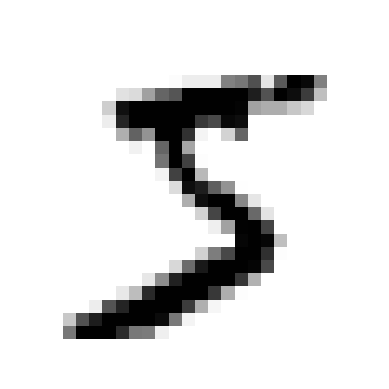

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image= image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [8]:
print(y[0])

5


In [9]:
X_train,X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]


In [10]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
y_test_pred=sgd_clf.predict(X_test)

In [51]:
y_test_pred_5=y_test_pred=='5'
print(y_test_5)

[False False False ... False  True False]


In [52]:
print(confusion_matrix(y_test_5,y_test_pred_5))

[[8991  117]
 [ 183  709]]


In [53]:
print(precision_score(y_test_5,y_test_pred_5))

0.8583535108958837


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [48]:
print(y_train_5)
print(y_train_pred)

[ True False False ...  True False False]
[ True False False ...  True False False]


In [15]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_train_5,y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


In [16]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))


0.8370879772350012
0.6511713705958311


In [17]:
y_scores= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds= precision_recall_curve(y_train_5,y_scores)

In [18]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


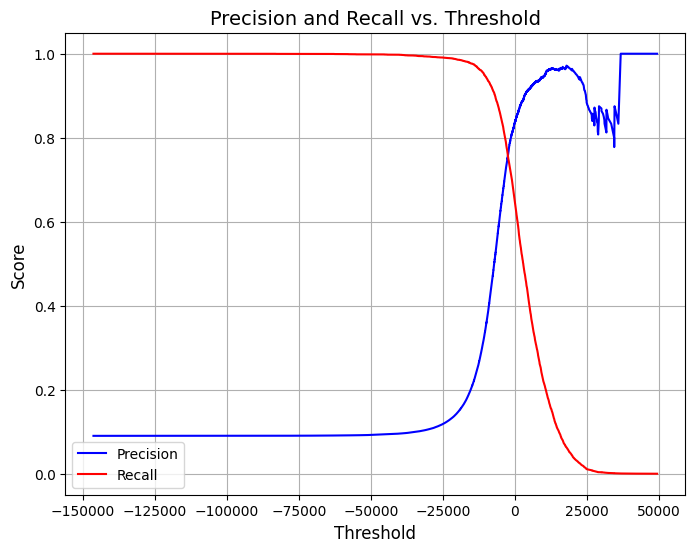

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b-", label="Precision")  # Blue line for Precision
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")  # Red line for Recall
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Precision and Recall vs. Threshold", fontsize=14)
plt.legend(loc="best")
plt.grid(True)
plt.show()

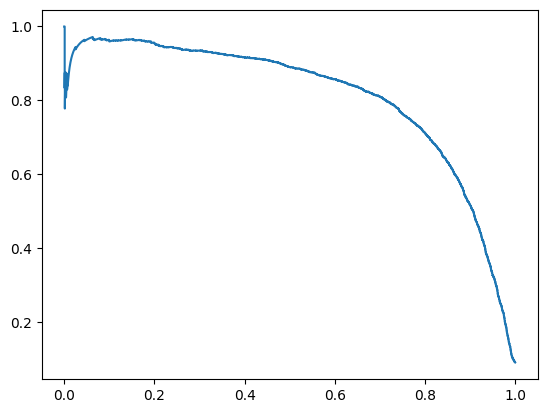

In [20]:
plt.plot(recalls,precision)
plt.show()


In [21]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_train_5,y_scores)

In [22]:
print(thresholds)

[  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


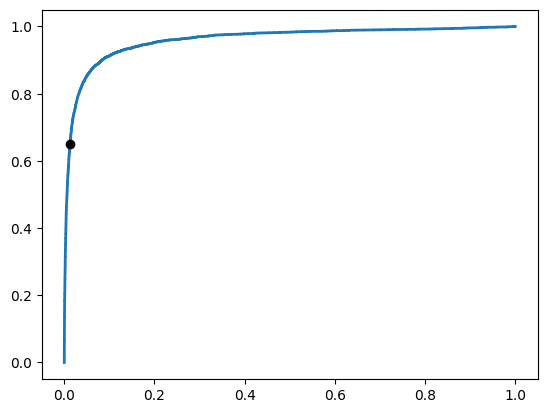

In [23]:
idx_for_threshold_at_90= (thresholds<=0.90).argmax()
tpr_90,fpr_90= tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.plot(fpr,tpr,linewidth=2,label="ROC curve")
#plt.plot([0,1],[0,1],'k:',label="Random classifier's ROC curve")
#plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.plot([fpr_90],[tpr_90],"ko")
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_scores))

0.9604938554008616


In [25]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [26]:
y_probas_forest= cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [27]:
print(y_probas_forest[:2])

[[0.11 0.89]
 [0.99 0.01]]


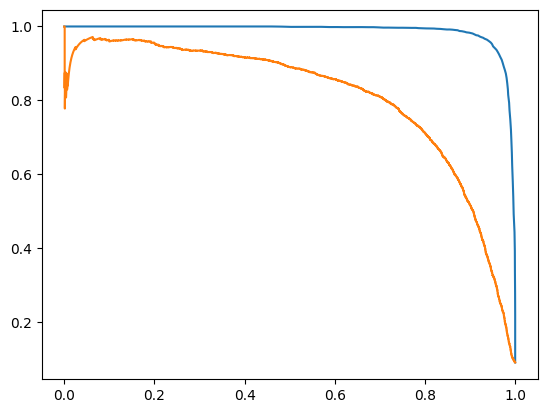

In [28]:
y_scores_forest=y_probas_forest[:,-1]
precision_forest,recalls_forest,thresholds_forest= precision_recall_curve(y_train_5,y_scores_forest)
plt.plot(recalls_forest,precision_forest)
plt.plot(recalls,precision)
plt.show()

In [29]:
print("ROC - SGDC",roc_auc_score(y_train_5,y_scores))
print("ROC -Randomforest",roc_auc_score(y_train_5,y_scores_forest))


ROC - SGDC 0.9604938554008616
ROC -Randomforest 0.9983436731328145


In [30]:
len(X_train)

60000

In [31]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])


SVC(random_state=42)

In [32]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [33]:
print(svm_clf.decision_function([some_digit]).round(2).argmax())

5


In [34]:
print(svm_clf.classes_)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [35]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [36]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [37]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [38]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [39]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])